# IS 4487 Lab 9

## Outline

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just two predictor variables and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_09_megatelco_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Megatelco Data Dictionary

 DEMOGRAPHIC VARIABLES:
 - College - has the customer attended some college (one, zero)
 - Income - annual income of customer
 - House - estimated price of the customer's home (if applicable)

 USAGE VARIABLES:
 - Data Overage Mb - Average number of megabytes that the customer used in excess of the plan limit (over last 12 months)
 - Data Leftover Mb - Average number of megabytes that the customer use was below the plan limit (over last 12 months)
 - Data Mb Used - Average number of megabytes used per month (over last 12 months)
 - Text Message Count - Average number of texts per month (over last 12 months)
 - Over 15 Minute Calls Per Month - Average number of calls over 15 minutes in duration per month (over last 12 months)
 - Average Call Duration- Average call duration (over last 12 months)

PHONE VARIABLES:
 - Operating System - Current operating system of phone
 - Handset Price - Retail price of the phone used by the customer

ATTITUDINAL VARIABLES:
 - Reported Satisfaction - Survey response to "How satisfied are you with your current phone plan?" (high, med, low)
 - Reported Usage Level - Survey response to "How much do your use your phone?" (high, med, low)
 - Considering Change of Plan - Survey response to "Are you currently planning to change companies when your contract expires?" (high, med, low)

OTHER VARIABLES
 - Leave - Did this customer churn with the last contract expiration? (LEAVE, STAY)
 - ID - Customer identifier

##Load Libraries

In this class we will be using
- Pandas
- Scikitlearn
- Matplotlib


In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the Megatelco dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe


In [9]:
import pandas as pd

file_path = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/Labs/DataSets/megatelco_leave_survey.csv"
df = pd.read_csv(file_path)


# 显示数据的基本信息
print(df.info())

# 显示数据的前几行
print(df.head())

# 统计数据的描述性信息
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      14999 non-null  object 
 1   income                       14999 non-null  int64  
 2   data_overage_mb              14999 non-null  int64  
 3   data_leftover_mb             14999 non-null  int64  
 4   data_mb_used                 14999 non-null  int64  
 5   text_message_count           14999 non-null  int64  
 6   house                        14999 non-null  int64  
 7   handset_price                14999 non-null  int64  
 8   over_15mins_calls_per_month  14996 non-null  float64
 9   average_call_duration        14999 non-null  int64  
 10  reported_satisfaction        14999 non-null  object 
 11  reported_usage_level         14999 non-null  object 
 12  considering_change_of_plan   14999 non-null  object 
 13  leave           

## Clean up the data
Did you notice anything unusual about the "house" amounts?

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [10]:
#delete rows with outlier data; put it in a new dataframe
df_clean = df[(df['house'] > 0) & (df['income'] > 0) & (df['handset_price'] < 10000)]

#delete any rows with missing values in the clean dataframe
df_clean = df_clean.dropna()

df_clean.describe()

,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,id
count,14990.000000,14990.000000,14990.000000,14990.000000,14990.000000,1.499000e+04,14990.000000,14990.000000,14990.000000,14990.000000
mean,242051.833689,153.593996,37.526217,4203.088192,135.629286,8.772144e+05,780.669446,10.571181,9.734556,11862.245430
std,109550.800640,112.996435,28.043476,2202.621977,48.837706,2.869092e+05,326.560845,8.401508,5.194135,6812.720757
min,52491.000000,0.000000,0.000000,400.000000,52.000000,3.200010e+05,215.000000,0.000000,1.000000,2.000000
25%,147917.250000,54.000000,12.000000,2297.250000,93.000000,6.446280e+05,498.000000,3.000000,5.000000,6139.500000
50%,241663.000000,151.000000,35.000000,4224.500000,135.000000,8.764390e+05,778.000000,9.000000,10.000000,11763.500000
75%,336483.500000,242.000000,62.000000,6080.000000,178.000000,1.098814e+06,1063.750000,17.000000,14.000000,17398.000000
max,432000.000000,380.000000,89.000000,8000.000000,220.000000,1.456389e+06,1350.000000,35.000000,19.000000,25354.000000


# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [11]:
#Get distinct values
df_clean['college'].unique()

array(['one', 'zero'], dtype=object)

In [12]:
df_clean['reported_satisfaction'] .unique()

array(['low', 'high', 'avg'], dtype=object)

In [13]:
df_clean['reported_usage_level'].unique()

array(['low', 'high', 'avg'], dtype=object)

In [14]:
df_clean['considering_change_of_plan'].unique()

array(['yes', 'no', 'maybe'], dtype=object)

In [15]:
df_clean.loc[df_clean['college'] == 'one', 'college'] = "1"
df_clean.loc[df_clean['college'] == 'zero', 'college'] = "0"
df_clean.loc[df_clean['reported_satisfaction'] == 'low', 'reported_satisfaction'] = "1"
df_clean.loc[df_clean['reported_satisfaction'] == 'avg', 'reported_satisfaction'] = "2"
df_clean.loc[df_clean['reported_satisfaction'] == 'high', 'reported_satisfaction'] = "3"
df_clean.loc[df_clean['reported_usage_level'] == 'low', 'reported_usage_level'] = "1"
df_clean.loc[df_clean['reported_usage_level'] == 'avg', 'reported_usage_level'] = "2"
df_clean.loc[df_clean['reported_usage_level'] == 'high', 'reported_usage_level'] = "3"
df_clean.loc[df_clean['considering_change_of_plan'] == 'yes', 'considering_change_of_plan'] = "1"
df_clean.loc[df_clean['considering_change_of_plan'] == 'no', 'considering_change_of_plan'] = "0"
df_clean.loc[df_clean['considering_change_of_plan'] == 'maybe', 'considering_change_of_plan'] = "0.5"

df_clean.head(10)

,college,income,data_overage_mb,data_leftover_mb,data_mb_used,text_message_count,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id,operating_system
0,1,403137,70,0,6605,199,841317,653,5.0,8,1,1,1,LEAVE,8183,Android
1,0,129700,67,16,6028,134,476664,1193,5.0,5,1,1,1,LEAVE,12501,IOS
2,0,69741,60,0,1482,176,810225,1037,3.0,8,1,1,1,STAY,7425,IOS
3,1,377572,0,22,3005,184,826967,1161,0.0,5,1,1,0,LEAVE,13488,IOS
4,0,382080,0,0,1794,74,951896,1023,0.0,14,1,1,1,STAY,11389,IOS
5,0,309746,0,56,2675,81,1272862,1200,5.0,1,1,3,1,STAY,14674,IOS
6,1,325592,79,24,7300,190,472330,1083,5.0,6,1,2,1,LEAVE,19100,IOS
7,1,131230,0,0,4489,89,613744,365,5.0,10,1,3,1,STAY,18170,Android
8,1,193667,0,0,1023,76,949829,347,1.0,8,3,1,0,LEAVE,3201,Android
9,1,419573,0,74,4631,209,818027,640,0.0,2,1,1,1,LEAVE,12612,Android


# Convert attributes to categories

- Leave
- College
- Reported satisfaction
- Reported usage level
- Considering change of plan

In [16]:
#Method #1
#df_clean['leave'] = pd.Categorical(df_clean['leave'])

#Method #2
df_clean['leave'] = df_clean['leave'].astype('category')
df_clean['college'] = df_clean['college'].astype('category')
df_clean['reported_satisfaction'] = df_clean['reported_satisfaction'].astype('category')
df_clean['reported_usage_level'] = df_clean['reported_usage_level'].astype('category')
df_clean['considering_change_of_plan'] = df_clean['considering_change_of_plan'].astype('category')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14990 entries, 0 to 14998
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      14990 non-null  category
 1   income                       14990 non-null  int64   
 2   data_overage_mb              14990 non-null  int64   
 3   data_leftover_mb             14990 non-null  int64   
 4   data_mb_used                 14990 non-null  int64   
 5   text_message_count           14990 non-null  int64   
 6   house                        14990 non-null  int64   
 7   handset_price                14990 non-null  int64   
 8   over_15mins_calls_per_month  14990 non-null  float64 
 9   average_call_duration        14990 non-null  int64   
 10  reported_satisfaction        14990 non-null  category
 11  reported_usage_level         14990 non-null  category
 12  considering_change_of_plan   14990 non-null  category
 13  leave 

## Calculate distribution of the outcome  
What is the proportion of people who churned?

Why should we care about this proportion?

1. An important step in EDA is to understand the distribution of the target variable.

2. The majority class in the target variable will serve as an important benchmark for model performance. If we used what we'll call a "majority class classifier"---this consists in always predicting the majority class, which in this case is `STAY`---we would be correct 1 - .49 or 51% of the time.  Another way of saying this is that majority class classifier in the MegaTelCo case would result in accuracy of .51.  

Accuracy is defined as the proportion of correctly predicted labels. It is a commonly used error metric for evaluating classifier performance.

Think about why a majority class model in this case would have an accuracy of .51.

Whatever later model we develop should have better accuracy than this performance benchmark.

In [17]:
#Add new field with binary value for leave
df_clean['leave_flag'] = df_clean['leave'].str.replace('STAY','0')
df_clean['leave_flag'] = df_clean['leave_flag'].str.replace('LEAVE','1')

#Convert to integer
df_clean['leave_flag'] = df_clean['leave_flag'].astype('int')

#Find the mean value
df_clean['leave_flag'].mean()


0.4982655103402268

## Fit a basic tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree."

What is the accuracy of the money tree?

In [18]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house']]
y = df_clean['leave']

money_tree = DecisionTreeClassifier()

# Create Decision Tree Classifer
money_tree = money_tree.fit(x,y)


## Preview the tree


In [19]:
money_tree_text = tree.export_text(money_tree)
print(money_tree_text)

|--- feature_1 <= 1200025.00
|   |--- feature_1 <= 534467.00
|   |   |--- class: LEAVE
|   |--- feature_1 >  534467.00
|   |   |--- feature_0 <= 329219.50
|   |   |   |--- feature_0 <= 326170.50
|   |   |   |   |--- feature_1 <= 1180154.50
|   |   |   |   |   |--- feature_0 <= 266701.00
|   |   |   |   |   |   |--- feature_0 <= 259224.50
|   |   |   |   |   |   |   |--- feature_0 <= 55673.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 54109.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 1127939.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 778451.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |   |--- feature_1 >  778451.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- feature_1 >  1127939.50
|   |   |   |   |   |   |   |   |   |   |--- feature_1 <= 1173610.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: L

## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [20]:
pred = money_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 1.0


## Prune the tree

Limit the number of levels to 2

In [21]:
money_tree2 = DecisionTreeClassifier(criterion="entropy", max_depth=2)

# Create Decision Tree Classifer
money_tree2 = money_tree2.fit(x,y)


## Preview the new tree

In [22]:
money_tree2_text = tree.export_text(money_tree2)
print(money_tree2_text)

|--- feature_1 <= 1200025.00
|   |--- feature_1 <= 534467.00
|   |   |--- class: LEAVE
|   |--- feature_1 >  534467.00
|   |   |--- class: LEAVE
|--- feature_1 >  1200025.00
|   |--- class: STAY



## Re-Check Accuracy

Is this accuracy better than making a random guess?  (check the distribution above)

In [23]:
pred = money_tree2.predict(x)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.6401601067378252


## Visualize the model

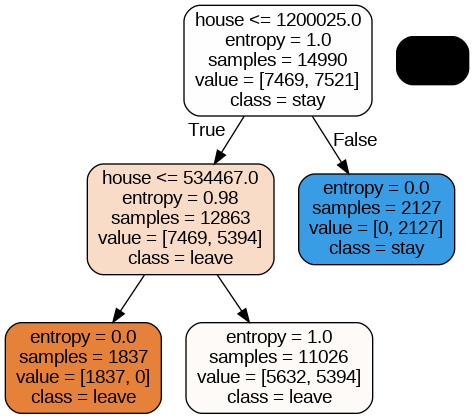

In [24]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(money_tree2, out_file=dot_data,
                   feature_names=x.columns,class_names=['leave','stay'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Fit a full tree model

Use all of the independent attributes.  We'll call this the "full tree."

What is the accuracy of the full tree?

In [25]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_clean[['income','house','college','data_overage_mb','data_leftover_mb','handset_price','over_15mins_calls_per_month','average_call_duration','reported_satisfaction','reported_usage_level','considering_change_of_plan']]
y = df_clean['leave']

full_tree = DecisionTreeClassifier(criterion="entropy", max_depth=1)

# Create Decision Tree Classifer
full_tree = full_tree.fit(x,y)


##Visualize the full tree

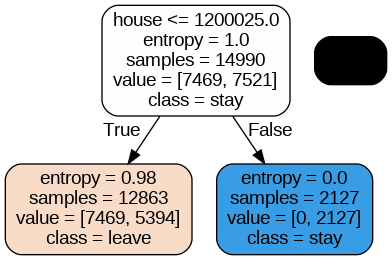

In [26]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(full_tree, out_file=dot_data,
                   feature_names=x.columns,class_names=['leave','stay'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

In [27]:
pred = full_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.6401601067378252


##Test and Train
Now we will split the dataset into 80% training data and 20% test data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##Create a new tree using only training data

In [29]:
train_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Create Decision Tree Classifer
train_tree = train_tree.fit(x_train,y_train)

##Apply the new tree to our test data

In [30]:
pred = train_tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.6614409606404269


## Visualize the trained tree

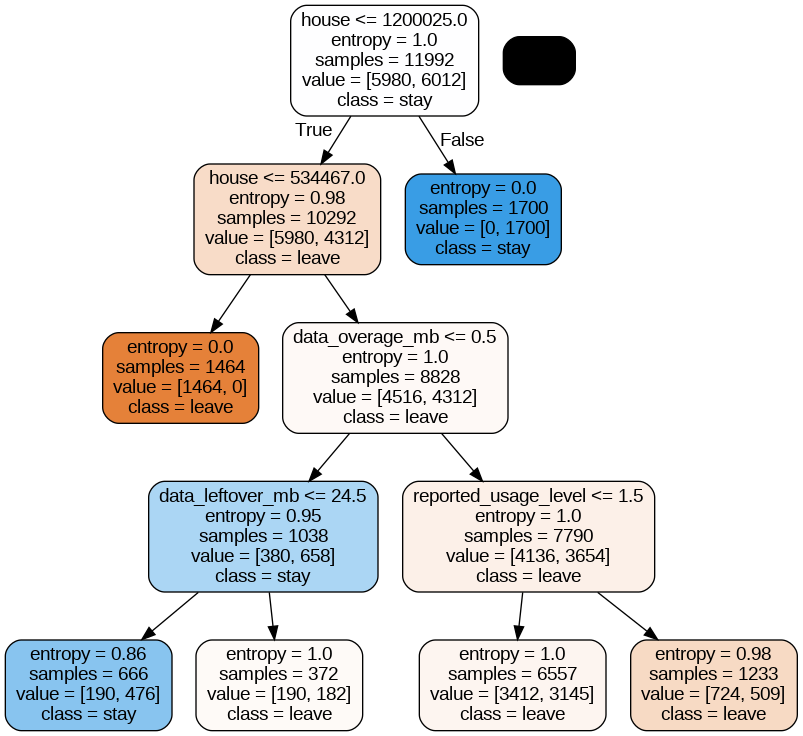

In [31]:
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(train_tree, out_file=dot_data,
                   feature_names=x.columns,class_names=['leave','stay'],
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Did the model improve?
👎  👍

## Fine Tune the Tree - Step 1

➡️ Assignment Tasks
- Create a new tree object using half the branch depth.  
- Display the accuracy of the new tree.  How does this affect the accuracy?

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the original decision tree
original_tree = DecisionTreeClassifier(random_state=42)
original_tree.fit(X_train, y_train)

# Get the maximum depth of the original tree
max_depth = original_tree.get_depth()
print(f"Original tree maximum depth: {max_depth}")

# Create a new decision tree with half the original depth
new_depth = max(1, max_depth // 2)  # Ensure the minimum depth is at least 1
new_tree = DecisionTreeClassifier(max_depth=new_depth, random_state=42)
new_tree.fit(X_train, y_train)

# Compute and display the accuracy of both models
original_accuracy = accuracy_score(y_test, original_tree.predict(X_test))
new_accuracy = accuracy_score(y_test, new_tree.predict(X_test))

print(f"Original tree accuracy: {original_accuracy:.4f}")
print(f"New tree (depth {new_depth}) accuracy: {new_accuracy:.4f}")

# Analyze the accuracy change
accuracy_change = new_accuracy - original_accuracy
print(f"Accuracy change: {accuracy_change:.4f}")


Original tree maximum depth: 6
Original tree accuracy: 1.0000
New tree (depth 3) accuracy: 1.0000
Accuracy change: 0.0000


## Fine Tune the Tree - Step 2

➡️ Assignment Tasks
- Create a new tree object using double the original branch depth.  
- Display the accuracy of the new tree.  How does this affect the accuracy?

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the original decision tree
original_tree = DecisionTreeClassifier(random_state=42)
original_tree.fit(X_train, y_train)

# Get the maximum depth of the original tree
original_max_depth = original_tree.get_depth()
print(f"Original tree maximum depth: {original_max_depth}")

# Create a new tree with double the original depth
new_depth = original_max_depth * 2  # Double the depth
new_tree = DecisionTreeClassifier(max_depth=new_depth, random_state=42)
new_tree.fit(X_train, y_train)

# Compute and display accuracy for both models
original_accuracy = accuracy_score(y_test, original_tree.predict(X_test))
new_accuracy = accuracy_score(y_test, new_tree.predict(X_test))

print(f"Original tree accuracy: {original_accuracy:.4f}")
print(f"New tree (depth {new_depth}) accuracy: {new_accuracy:.4f}")

# Analyze the accuracy change
accuracy_change = new_accuracy - original_accuracy
print(f"Accuracy change: {accuracy_change:.4f}")


Original tree maximum depth: 6
Original tree accuracy: 1.0000
New tree (depth 12) accuracy: 1.0000
Accuracy change: 0.0000


## Fine Tune the Tree - Step 3

➡️ Assignment Tasks
- Create a new tree with the maximum depth possible.  
- Display the accuracy of the new tree.  How does this affect the accuracy?

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree with the maximum depth possible (no depth limit)
max_depth_tree = DecisionTreeClassifier(max_depth=None, random_state=42)
max_depth_tree.fit(X_train, y_train)

# Compute and display accuracy
max_depth_accuracy = accuracy_score(y_test, max_depth_tree.predict(X_test))

print(f"New tree (maximum depth) accuracy: {max_depth_accuracy:.4f}")


New tree (maximum depth) accuracy: 1.0000


## Fine Tune the Tree - Step 4

➡️ Assignment Tasks
- What is the maximum accuracy that you can achieve with 5 levels using other parameters, like test/training percentage, min_bucket, or min_split?  
- Display the accuracy of the new tree.  It must be more accurate than the previous three steps

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load dataset (Iris dataset as an example)
data = load_iris()
X, y = data.data, data.target

# Experiment with different train-test splits
best_accuracy = 0
best_params = {}

for test_size in [0.1, 0.2, 0.3]:  # Trying different train-test splits
    for min_samples_split in [2, 5, 10]:  # Adjusting min split size
        for min_samples_leaf in [1, 2, 5]:  # Adjusting min bucket size

            # Split dataset
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

            # Create a decision tree with max depth = 5
            tree = DecisionTreeClassifier(max_depth=5, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
            tree.fit(X_train, y_train)

            # Compute accuracy
            accuracy = accuracy_score(y_test, tree.predict(X_test))

            # Save best parameters if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {
                    "test_size": test_size,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf
                }

# Display the best accuracy and parameters
print(f"Best accuracy with max_depth=5: {best_accuracy:.4f}")
print(f"Best parameters: {best_params}")


Best accuracy with max_depth=5: 1.0000
Best parameters: {'test_size': 0.1, 'min_samples_split': 2, 'min_samples_leaf': 1}
